# Wetwin widgets

Ipywidgets is a great package for adding controls (buttons, sliders, checkboxes, etc) to your Jupyter notebooks. But after experimenting for some time it became clear that it's easy to create a very messy code. A major difficulty are the numerous links between the graphical elements that contrasts to the desire to write reusable code. The default GUI elemenents in IPyWidgets are reusable, but they need call backs and update methods to function. It is possible to hardwire all this from the outside, but the number of links increases rapidly with the number of widgets on the screen.

## Centralized variables

By default, the variables represented eg by a slider are not linked to the other GUI elements. Below, we attempt an alternative approach where the widgets are linked by an object called a 'variable'. The aim is to use a 'variable' as a central point for connecting the gui elements. Multiple buttons, graphs, etc can be connected to the same variable and will be synchronized automatically. For example you can have two plots and one timeslider connected to the samevariable. When the slider is moved then both plots are updated. If you really need two separate time variables, then you can still create two variables and connect all gui elements to the relevant time.

## IPyLeaflet

IPyLeaflet is a python package for showing interactive maps in a jupyter notebook. We aim to extend the wetwin gui elements/widgets to IPyLeaflet in the near future.

## Development

A disadvantage of this approach is that ipywidget gui elements need to be wrapped. It is unrealistic to wrap all of them in one go, so we'll have to live with missing gui elements. However, we'll keep the wrappers very small and you'll probably be able to adapt an existing one to your needs.

## Demo

This notebook demonstrates the dynamic variables and show how you can link them to other gui elements.

In [1]:
# Import external packages

# arrays
import xarray as xr
import numpy as np 
# plotting
import matplotlib.pyplot as plt 
%matplotlib widget
plt.rcParams['figure.figsize'] = [6, 4]
# gui elements
import ipywidgets as widgets
#from ipyleaflet import *

In [2]:
# Import wetwin_widgets
import wetwin as wt


In [3]:
wt.WtIntSlider


wetwin.wt_widgets.WtIntSlider

## Demo of class Variable

Several variable types have been wrapped in a class derived from Variable. These have a name, a label
and you can attach an object that will be informed of changes to the variable, by a call like myobj.update(this_variable). Updating will typically be automatic, except when you develop your own widgets, or plots that do not derive from wetwin classes.

At the moment the following variables are implemented:
- IntVariable : contains a single number eg 4 in a range eg 2,...,12
- ListVariable : points to a value in a list of things, eg "apple" in the list ["apple", "orange", "banana"]

There is a short demo below.

In [4]:

# Create a variable with an integer in a range
v1=wt.IntVariable("layer","Vertical layer number",1,10,1) # name, label, min, max, initial value
# Use the variable
print(f'variable name={v1.name} label={v1.label}\n')
print(f'current {v1.name} has value {v1.value} of range {v1.min}:{v1.max}\n')

# Create an action linked to a change to the variable
#   This is the mechanism to link the variable to a plot or other widget, if you develop your own
class DemoObserver:
    def __init__(self):
        self.current=None
    def update(self,v):
        self.current=v.value
obs=DemoObserver()
v1.observe(obs)
v1.value=3 #change the value
print("change value\n")
print(f'current {v1.name} has value {v1.value} of range {v1.min}:{v1.max}\n')
print(f'the observer received value {obs.current}')

print("---------------------------------\n")

# a variable with a selection from a list
v2=wt.ListVariable("station","Station name",["Vlissingen","Hoek van Holland","Platform K13"])
print(f'variable name={v2.name} label={v2.label}\n')
print(f'current {v2.name} has value {v2.value} which denotes {v2.value_str} \n')

v2.value=1
print(f'current {v2.name} has value {v2.value} which denotes {v2.value_str} \n')

v2.value_str="Platform K13"
print(f'current {v2.name} has value {v2.value} which denotes {v2.value_str} \n')

print("---------------------------------\n")


variable name=layer label=Vertical layer number

current layer has value 1 of range 1:10

set value of layer to 3

change value

current layer has value 3 of range 1:10

the observer received value 3
---------------------------------

variable name=station label=Station name

current station has value 0 which denotes Vlissingen 

set value of station to 1

current station has value 1 which denotes Hoek van Holland 

set value of station to Platform K13

current station has value 2 which denotes Platform K13 

---------------------------------



## Integers

Selection from a range of integers is eg usefull to select a layer to be plotted.

Below is a small demo that connects two sliders and a label. Note that the two sliders are linked, because they refer to the same variable. Move one of the sliders and observe the effects.

In [5]:
# Demo for Int slider and label.
# The two widgets are both connected with the variable
v2=wt.IntVariable("itime","Time-step",1,100,1)
sld2a=wt.WtIntSlider(v2)
sld2b=wt.WtIntSlider(v2)
#We also add a label that is connected to the same variable
lbl2=wt.WtIntLabel(v2)
display(sld2a,sld2b,lbl2)

WtIntSlider(value=1, continuous_update=False, description='Time-step', min=1)

WtIntSlider(value=1, continuous_update=False, description='Time-step', min=1)

WtIntLabel(value='1', description='Time-step')

## A list of items

A list of items can for example be usefull as a list of location names.

Below is a small demo with a dropdown selection. This again uses two controls linked to the same list, to show that all widgets connected to the same variable are linked.

In [6]:
v3=wt.ListVariable("station","Station name",["Vlissingen","Hoek van Holland","Platform K13"])
sld3a=wt.WtListDropdown(v3)
sld3b=wt.WtListDropdown(v3)
lbl3=wt.WtListLabel(v3)
display(sld3a,sld3b,lbl3)

WtListDropdown(description='Station name', options=('Vlissingen', 'Hoek van Holland', 'Platform K13'), value='…

WtListDropdown(description='Station name', options=('Vlissingen', 'Hoek van Holland', 'Platform K13'), value='…

WtListLabel(value='Vlissingen', description='Station name')

In [7]:
# You can also change a value manually. This will update all widgets connected to the same variable.
# Note what happens to the widgets above, when you run this cell.
v3.value=2 # Select the third item in the list, which is "Platform K13"

#TODO there is quite some activity after only one change


set value of station to 2

dropdown receives signal from variable station. Value is Platform K13

signal from dropdown
set value of station to Platform K13

dropdown receives signal from variable station. Value is Platform K13

dropdown receives signal from variable station. Value is Platform K13

signal from dropdown
set value of station to Platform K13

dropdown receives signal from variable station. Value is Platform K13

dropdown receives signal from variable station. Value is Platform K13

signal from variable station. Value is 2

signal from variable station. Value is 2

dropdown receives signal from variable station. Value is Platform K13

signal from variable station. Value is 2



## Plots

wtPlot uses the ipywidgets.Output to create a link to the matplotlib plots. To use this class, you must extend it and implement the method redraw().

redrawing plot


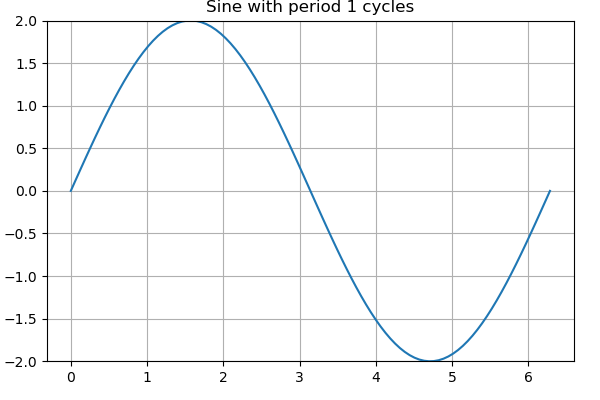

signal from slider
set value of iperiod to 3

slider receives signal from variable iperiod. Value is 3

redrawing plot
signal from slider
set value of iperiod to 2

slider receives signal from variable iperiod. Value is 2

redrawing plot
signal from slider
set value of iperiod to 3

slider receives signal from variable iperiod. Value is 3

redrawing plot
signal from slider
set value of iperiod to 4

slider receives signal from variable iperiod. Value is 4

redrawing plot
signal from slider
set value of iperiod to 5

slider receives signal from variable iperiod. Value is 5

redrawing plot
signal from slider
set value of iperiod to 3

slider receives signal from variable iperiod. Value is 3

redrawing plot
signal from slider
set value of iperiod to 2

slider receives signal from variable iperiod. Value is 2

redrawing plot


In [8]:
class MyPlot1(wt.wtPlot):
    def __init__(self,variables,amplitude,*args,**kwargs): # You can add your own arguments before *args
        super().__init__(variables,*args,**kwargs) #this is needed and will link to the variables
        #expand here with your own data
        self.amplitude=amplitude
    def redraw(self):
        ax=self.ax
        period=self.variables[0].value
        x = np.linspace(0, period * 2 * np.pi, 100)
        ax.plot(x, self.amplitude * np.sin(x), color='C0')
        plt.title(f"Sine with period {period} cycles")
        ax.set_ylim([-2, 2])
        ax.grid(True)

int1=wt.IntVariable("iperiod","# cycles",1,10,1) #define variable
amplitude=2.0
int1sld=wt.WtIntSlider(int1) #create slider linked to variable int1
p1=MyPlot1([int1],amplitude) #create plot linked to variable int1, too
gui=widgets.VBox([int1sld,p1]) #vertical stack of slider and plot
display(gui)
p1.redraw()